In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
cd /content/drive/My Drive/Kaggle Digit Recogniser

/content/drive/My Drive/Kaggle Digit Recogniser


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
y_train = data['label']

In [ ]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [ ]:
y_train.shape

(42000,)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,len(y_train.unique()))

In [ ]:
x_train = data.drop('label',axis=1)

In [ ]:
x_train = x_train / 255

In [ ]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
data_images = []
for i in range(x_train.shape[0]):
    store = np.asarray(x_train.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [ ]:
data_images = np.asarray(data_images)

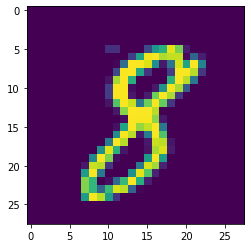

In [ ]:
plt.imshow(data_images[20])

In [ ]:
data_images.shape

(42000, 28, 28)

In [ ]:
data_images[1].max()

1.0

In [ ]:
data_images[1].min()

0.0

In [ ]:
x_train = data_images.reshape(42000,28,28,1)

In [ ]:
import math
print (math.pi)

3.141592653589793


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataGen = ImageDataGenerator(width_shift_range = 0.1,
  height_shift_range = 0.1,
  zoom_range = 0.1,
  rotation_range = 10,
  shear_range = 10/180 * math.pi)
dataGen.fit(x_train)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime, os

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=126, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=1024, kernel_size=(3,3), activation='relu'))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# Drop Layer
model.add(Dropout(0.2))

# FLATTEN IMAGES BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=6, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)
logdir = os.path.join("logs", datetime.datetime.today().strftime('%Y-%m-%d-%H:%M:%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


early_stop = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00005,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 10, 10, 126)       72702     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 8, 8, 256)         290560    
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 6, 6, 512)         1180160   
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 4, 4, 1024)      

In [ ]:
int(x_train.shape[0]/8)

5250

In [ ]:
train_gen = dataGen.flow(x_train, y_train, batch_size=int(x_train.shape[0]/8))

In [ ]:
model.fit(train_gen, epochs=500, callbacks=[tensorboard_callback, reduce_lr, early_stop])

Epoch 1/500
2/8 [======>.......................] - ETA: 11s - loss: 2.9735 - accuracy: 0.0977WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.7692s vs `on_train_batch_end` time: 3.0299s). Check your callbacks.


8/8 [==============================] - 25s 3s/step - loss: 2.4902 - accuracy: 0.1140
Epoch 2/500
8/8 [==============================] - 25s 3s/step - loss: 2.6140 - accuracy: 0.1577
Epoch 3/500
8/8 [==============================] - 25s 3s/step - loss: 2.2382 - accuracy: 0.1588
Epoch 4/500
8/8 [==============================] - 25s 3s/step - loss: 2.2582 - accuracy: 0.2150
Epoch 5/500
8/8 [==============================] - 25s 3s/step - loss: 1.9957 - accuracy: 0.3353
Epoch 6/500
8/8 [==============================] - 25s 3s/step - loss: 1.9764 - accuracy: 0.3341
Epoch 7/500
8/8 [==============================] - 25s 3s/step - loss: 1.7894 - accuracy: 0.4041
Epoch 8/500
8/8 [==============================] - 25s 3s/step - loss: 1.4137 - accuracy: 0.5336
Epoch 9/500
8/8 [==============================] - 25s 3s/step - loss: 1.1816 - accuracy: 0.5968
Epoch 10/500
8/8 [==============================] - 25s 3s/step - loss: 1.0326 - accuracy: 0.6643
Epoch 11/500
8/8 [=======================

In [ ]:
# %tensorboard --logdir logs

In [ ]:
test_data = pd.read_csv('./test.csv')
test_data = test_data / 255
data_images = []
for i in range(test_data.shape[0]):
    store = np.asarray(test_data.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [ ]:
data_images = np.asarray(data_images)
test_images = data_images.reshape(28000,28,28,1)
test_predictions = model.predict_classes(test_images)
export = []
for i in range(test_data.shape[0]):
    export.append([i+1,test_predictions[i]])
df = pd.DataFrame(export, columns=['ImageId', 'Label'])
df.to_csv(r'./Submission_'+datetime.datetime.today().strftime('%Y-%m-%d-%H:%M:%S')+'.csv',index=False)

In [ ]:
  import random
  def show_random_numbers():
    rows, cols = 5, 5 
    fig, axs = plt.subplots(rows, cols)
    fig.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    for i in range(rows):
      for j in range(cols):
        x = random.randint(0,len(data_images)-1)
        axs[i,j].imshow(data_images[x], cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title(test_predictions[x])

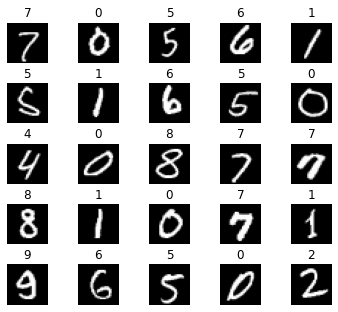

In [ ]:
show_random_numbers()

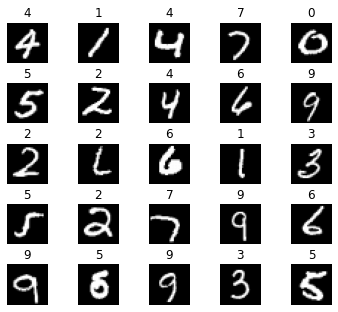

In [ ]:
show_random_numbers()

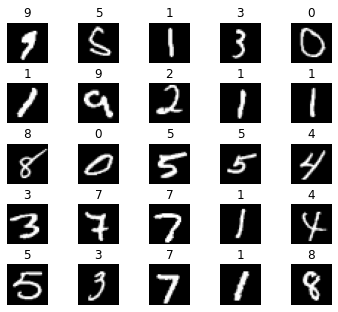

In [ ]:
show_random_numbers()